## Exploratory Data Analysis of the ,,Cervical Cancer Behavior Risk" dataset.
### Link: https://www.kaggle.com/datasets/loveall/cervical-cancer-risk-classification

The dataset is about cervical cancer.
Includes a list of cervical cancer risk factors leading to biopsy examination.

Features: 
* Age in years.
* Number of sexual partners.
* First sexual intercourse (age in years).
* Number of pregnancies.
* Smoking yes or no.
* Smoking (in years).
* Hormonal contraceptives yes or no.
* Hormonal contraceptives (in years).
* Intrauterine device yes or no (IUD).
* Number of years with an intrauterine device (IUD).
* Has patient ever had a sexually transmitted disease (STD) yes or no.
* Number of STD diagnoses.
* Time since first STD diagnosis.
* Time since last STD diagnosis.
* The biopsy results “Healthy” or “Cancer”. Target outcome -> 1 for sick, 0 for healthy women.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid")
%matplotlib inline

In [2]:
# load dataset
cancer = pd.read_csv('kag_risk_factors_cervical_cancer.csv')
cancer.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


### I renamed Biopsy to outcome to stick with the naming from the other collections analyzed.


In [3]:
cancer.rename(columns={'Biopsy' : 'Outcome'}, inplace=True)
cancer.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Outcome
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


In [4]:
cancer.Outcome.value_counts() # 803 healthy people, 55 sick people
# the dataset is imbalanced

Outcome
0    803
1     55
Name: count, dtype: int64

In [5]:
cancer.shape

(858, 36)

In [6]:
cancer.columns.values

array(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)',
       'Smokes (packs/year)', 'Hormonal Contraceptives',
       'Hormonal Contraceptives (years)', 'IUD', 'IUD (years)', 'STDs',
       'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis',
       'STDs: Time since last diagnosis', 'Dx:Cancer', 'Dx:CIN', 'Dx:HPV',
       'Dx', 'Hinselmann', 'Schiller', 'Citology', 'Outcome'],
      dtype=object)

In [7]:
cancer['Smokes'].value_counts() # '?' missing data

Smokes
0.0    722
1.0    123
?       13
Name: count, dtype: int64

In [8]:
cancer['Number of sexual partners'].value_counts() # 26 '?'

Number of sexual partners
2.0     272
3.0     208
1.0     206
4.0      78
5.0      44
?        26
6.0       9
7.0       7
8.0       4
15.0      1
10.0      1
28.0      1
9.0       1
Name: count, dtype: int64

### '?' is the missing data. I need to replace it with NaN

In [9]:
ccancer = cancer.replace('?', np.nan)

In [10]:
ccancer.info() # I check data type - lots of object type features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           832 non-null    object
 2   First sexual intercourse            851 non-null    object
 3   Num of pregnancies                  802 non-null    object
 4   Smokes                              845 non-null    object
 5   Smokes (years)                      845 non-null    object
 6   Smokes (packs/year)                 845 non-null    object
 7   Hormonal Contraceptives             750 non-null    object
 8   Hormonal Contraceptives (years)     750 non-null    object
 9   IUD                                 741 non-null    object
 10  IUD (years)                         741 non-null    object
 11  STDs                                753 non-null    object

In [11]:
ccancer.isna().sum()

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

### Lots of missing data; especially for columns: 'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis'. I'll remove them because they contribute nothing to the analysis.

In [12]:
ccancer = ccancer.drop(columns=['STDs: Time since last diagnosis','STDs: Time since first diagnosis'], axis=1)

In [13]:
ccancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           832 non-null    object
 2   First sexual intercourse            851 non-null    object
 3   Num of pregnancies                  802 non-null    object
 4   Smokes                              845 non-null    object
 5   Smokes (years)                      845 non-null    object
 6   Smokes (packs/year)                 845 non-null    object
 7   Hormonal Contraceptives             750 non-null    object
 8   Hormonal Contraceptives (years)     750 non-null    object
 9   IUD                                 741 non-null    object
 10  IUD (years)                         741 non-null    object
 11  STDs                                753 non-null    object

In [14]:
# convert data to numeric; I used to_numeric to keep NaN information intact
ccancer = ccancer.apply(pd.to_numeric, errors='ignore')

In [15]:
ccancer.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    int64  
 1   Number of sexual partners           832 non-null    float64
 2   First sexual intercourse            851 non-null    float64
 3   Num of pregnancies                  802 non-null    float64
 4   Smokes                              845 non-null    float64
 5   Smokes (years)                      845 non-null    float64
 6   Smokes (packs/year)                 845 non-null    float64
 7   Hormonal Contraceptives             750 non-null    float64
 8   Hormonal Contraceptives (years)     750 non-null    float64
 9   IUD                                 741 non-null    float64
 10  IUD (years)                         741 non-null    float64
 11  STDs                                753 non-n

In [16]:
ccancer.isin({0}).sum() # a lot of '0' values

Age                                     0
Number of sexual partners               0
First sexual intercourse                0
Num of pregnancies                     16
Smokes                                722
Smokes (years)                        722
Smokes (packs/year)                   722
Hormonal Contraceptives               269
Hormonal Contraceptives (years)       269
IUD                                   658
IUD (years)                           658
STDs                                  674
STDs (number)                         674
STDs:condylomatosis                   709
STDs:cervical condylomatosis          753
STDs:vaginal condylomatosis           749
STDs:vulvo-perineal condylomatosis    710
STDs:syphilis                         735
STDs:pelvic inflammatory disease      752
STDs:genital herpes                   752
STDs:molluscum contagiosum            752
STDs:AIDS                             753
STDs:HIV                              735
STDs:Hepatitis B                  

In [17]:
ccancer.duplicated().sum()

23

In [18]:
ccancer.Outcome[ccancer.duplicated()].value_counts()

Outcome
0    22
1     1
Name: count, dtype: int64

### 23 duplicates - compared to the whole collection, there are not so many. I remove them.

In [19]:
ccancer.drop_duplicates(inplace = True)

In [20]:
ccancer.duplicated().sum()

0

In [21]:
ccancer.isna().sum()

Age                                     0
Number of sexual partners              25
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               103
Hormonal Contraceptives (years)       103
IUD                                   112
IUD (years)                           112
STDs                                  100
STDs (number)                         100
STDs:condylomatosis                   100
STDs:cervical condylomatosis          100
STDs:vaginal condylomatosis           100
STDs:vulvo-perineal condylomatosis    100
STDs:syphilis                         100
STDs:pelvic inflammatory disease      100
STDs:genital herpes                   100
STDs:molluscum contagiosum            100
STDs:AIDS                             100
STDs:HIV                              100
STDs:Hepatitis B                  

### About 100 missing values for the selected column. Compared to the entire collection, this is not that many.

In [22]:
# I don't want to lose the data of sick people, because there are few of them, so I delete the rows with NaN, where Outcome == 0
ccancer = ccancer[~((ccancer['Outcome'] == 0) & ccancer.isna().any(axis=1))]

# For those who are sick where there are data gaps, I replace NaN with the median
mediana = ccancer[ccancer['Outcome'] == 1].median()
ccancer.loc[ccancer['Outcome'] == 1] = ccancer.loc[ccancer['Outcome'] == 1].fillna(mediana)


In [23]:
ccancer.isna().sum()

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


In [24]:
ccancer.info()  

<class 'pandas.core.frame.DataFrame'>
Index: 660 entries, 0 to 857
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 660 non-null    int64  
 1   Number of sexual partners           660 non-null    float64
 2   First sexual intercourse            660 non-null    float64
 3   Num of pregnancies                  660 non-null    float64
 4   Smokes                              660 non-null    float64
 5   Smokes (years)                      660 non-null    float64
 6   Smokes (packs/year)                 660 non-null    float64
 7   Hormonal Contraceptives             660 non-null    float64
 8   Hormonal Contraceptives (years)     660 non-null    float64
 9   IUD                                 660 non-null    float64
 10  IUD (years)                         660 non-null    float64
 11  STDs                                660 non-null  

### The dataset now contains 660 data.

In [25]:
ccancer.Outcome.value_counts()

Outcome
0    606
1     54
Name: count, dtype: int64

### 606 healthy people, 54 sick people (1 sick person lost by removing duplicates)

In [26]:
# division of data into numerical and categorical
categorical = ccancer[['Smokes', 'Hormonal Contraceptives', 'IUD', 'STDs', 'STDs:condylomatosis', 'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis', 'STDs:pelvic inflammatory disease', 'STDs:genital herpes', 'STDs:molluscum contagiosum',
'STDs:HIV', 'STDs:AIDS','STDs:cervical condylomatosis', 'STDs:Hepatitis B', 'STDs:HPV', 'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller', 'Citology', 'Outcome']]
numerical = ccancer[['Age', 'Number of sexual partners', 'First sexual intercourse', 'Num of pregnancies', 'Smokes (years)', 'Smokes (packs/year)', 'Hormonal Contraceptives (years)', 'IUD (years)', 'STDs (number)', 'STDs: Number of diagnosis']]

In [27]:
numerical.isin({0}).sum()

Age                                  0
Number of sexual partners            0
First sexual intercourse             0
Num of pregnancies                  14
Smokes (years)                     562
Smokes (packs/year)                562
Hormonal Contraceptives (years)    228
IUD (years)                        585
STDs (number)                      593
STDs: Number of diagnosis          599
dtype: int64

### Lots of zero values. It seems to me that these are negative results -> e.g. for women who did not smoke, were not pregnant or did not take birth control pills. Rather, they are not missing data.

In [28]:
numerical.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Age,660.0,27.48,8.67,13.0,21.0,26.0,33.0,84.0
Number of sexual partners,660.0,2.55,1.64,1.0,2.0,2.0,3.0,28.0
First sexual intercourse,660.0,17.15,2.87,10.0,15.0,17.0,18.0,32.0
Num of pregnancies,660.0,2.36,1.46,0.0,1.0,2.0,3.0,11.0
Smokes (years),660.0,1.31,4.33,0.0,0.0,0.0,0.0,37.0
Smokes (packs/year),660.0,0.49,2.42,0.0,0.0,0.0,0.0,37.0
Hormonal Contraceptives (years),660.0,2.35,3.77,0.0,0.0,0.5,3.0,22.0
IUD (years),660.0,0.54,2.01,0.0,0.0,0.0,0.0,19.0
STDs (number),660.0,0.17,0.56,0.0,0.0,0.0,0.0,4.0
STDs: Number of diagnosis,660.0,0.10,0.32,0.0,0.0,0.0,0.0,3.0


In [29]:
ccancer.nunique() 

Age                                   43
Number of sexual partners              9
First sexual intercourse              21
Num of pregnancies                    11
Smokes                                 2
Smokes (years)                        30
Smokes (packs/year)                   55
Hormonal Contraceptives                2
Hormonal Contraceptives (years)       38
IUD                                    2
IUD (years)                           25
STDs                                   2
STDs (number)                          5
STDs:condylomatosis                    2
STDs:cervical condylomatosis           1
STDs:vaginal condylomatosis            2
STDs:vulvo-perineal condylomatosis     2
STDs:syphilis                          2
STDs:pelvic inflammatory disease       2
STDs:genital herpes                    2
STDs:molluscum contagiosum             2
STDs:AIDS                              1
STDs:HIV                               2
STDs:Hepatitis B                       2
STDs:HPV        

In [30]:
np.sort(ccancer['Outcome'].unique()) 

array([0, 1], dtype=int64)

### Statistics:
* Age [Age]: Women aged 13 to 84.
* Number of sexual partners: 1-8 and 28
* First sexual intercourse: 10-32 years
* Number of pregnancies: 0-11
* Cigarette smoking [Smokes]: 0 or 1 [no or yes]
* How many years of smoking [Smokes (years)]: 0-37 (but only for 98 female smokers)
* Number of packs of cigarettes smoked per year [Smokes (packs/year)]: 0-37
* Taking contraceptives: 0 or 1 [no or yes]
* Number of years taking contraceptives: 0-22 years (for 432 women)
* Use of an intrauterine device [IUD]: 0 or 1 [no or yes]
* How many years of IUD [IUD (years)]: 0-19 years
* Sexually transmitted diseases [STDs]: 0 or 1 [no or yes]
* Number of STDs [STDs (number)]: 0-4 (for 67 women)
* Prevalence of condylomata [STDs:condylomatosis]: 0 or 1 [no or yes]
* Condylomata on the cervix [STDs:cervical condylomatosis]: only 0. Should I remove this category?
* Vaginal condylomatosis [STDs:vaginal condylomatosis]: 0 or 1 [no or yes]
* Vulvo-perineal condylomatosis [STDs:vulvo-perineal condylomatosis]: 0 or 1 [no or yes]
* Syphilis [STDs:syphilis]: 0 or 1 [no or yes]
* Pelvic inflammatory disease [STDs:pelvic inflammatory disease]: 0 or 1 [no or yes]
* Genital herpes [STDs:genital herpes]: 0 or 1 [no or yes]
* Common mollusk [STDs:molluscum contagiosum]: 0 or 1 [no or yes]
* AIDS [STDs:AIDS]: 0 - no cases
* HIV [STDs:HIV]: 0 or 1 [no or yes]
* HBV virus [STDs:Hepatitis B]: 0 or 1 [no or yes]
* Papillomavirus [STDs:HPV]: 0 or 1 [no or yes]
* Number of diagnoses [STDs: Number of diagnosis]: 0-3
* Dx Cancer Test [Dx:Cancer]: 0 or 1 [no or yes]
* Dx test for cervical intraepithelial neoplasia [Dx:CIN]: 0 or 1 [no or yes]
* Dx HPV test [Dx:HP]: 0 or 1 [no or yes]
* Dx Test [Dx]: 0 or 1 [no or yes]
* Colposcopy [Hinselmann]: 0 or 1 [no or yes]
* Schiller test [Schiller]: 0 or 1 [no or yes]
* Citology: 0 or 1 [no or yes]
* Outcome: woman with cancer '1' or without cancer '0'

### Lots of categorical data and subgroups for numerical data. AIDS and cervical condylomatosis do not contribute anything because none of the patients suffered from them. So I'll remove them and split the data into numerical and categorical.

In [31]:
ccancer = ccancer.drop(columns=['STDs:AIDS','STDs:cervical condylomatosis'], axis=1)

In [32]:
# re-split data into numeric and categorical
categorical = ccancer[['Smokes', 'Hormonal Contraceptives', 'IUD', 'STDs', 'STDs:condylomatosis', 'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis', 'STDs:pelvic inflammatory disease', 'STDs:genital herpes', 'STDs:molluscum contagiosum',
'STDs:HIV', 'STDs:Hepatitis B', 'STDs:HPV', 'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller', 'Citology', 'Outcome']]
numerical = ccancer[['Age', 'Number of sexual partners', 'First sexual intercourse', 'Num of pregnancies', 'Smokes (years)', 'Smokes (packs/year)', 'Hormonal Contraceptives (years)', 'IUD (years)', 'STDs (number)', 'STDs: Number of diagnosis']]

In [33]:
print(categorical.shape)
print(numerical.shape)

(660, 22)
(660, 10)


### 22 categorical columns, 10 numeric columns

In [34]:
ccancer.Outcome.value_counts() # 606 healthy women, only 44 sick

Outcome
0    606
1     54
Name: count, dtype: int64

### Very large disproportion between sick and healthy people. Data is imbalanced.

In [35]:
ccancer.Outcome.value_counts(normalize = True).round(2) # 92% healthy, 0,08% sick

Outcome
0    0.92
1    0.08
Name: proportion, dtype: float64

In [36]:
ccancer.Smokes.value_counts()

Smokes
0.0    562
1.0     98
Name: count, dtype: int64

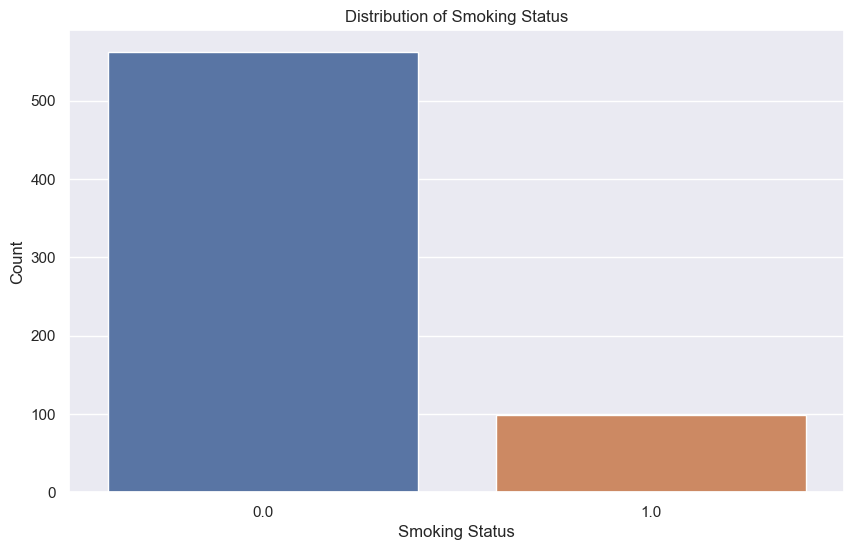

In [37]:
plt.figure(figsize=(10, 6))
sns.countplot(x = 'Smokes', data = ccancer)
plt.title('Distribution of Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.show()

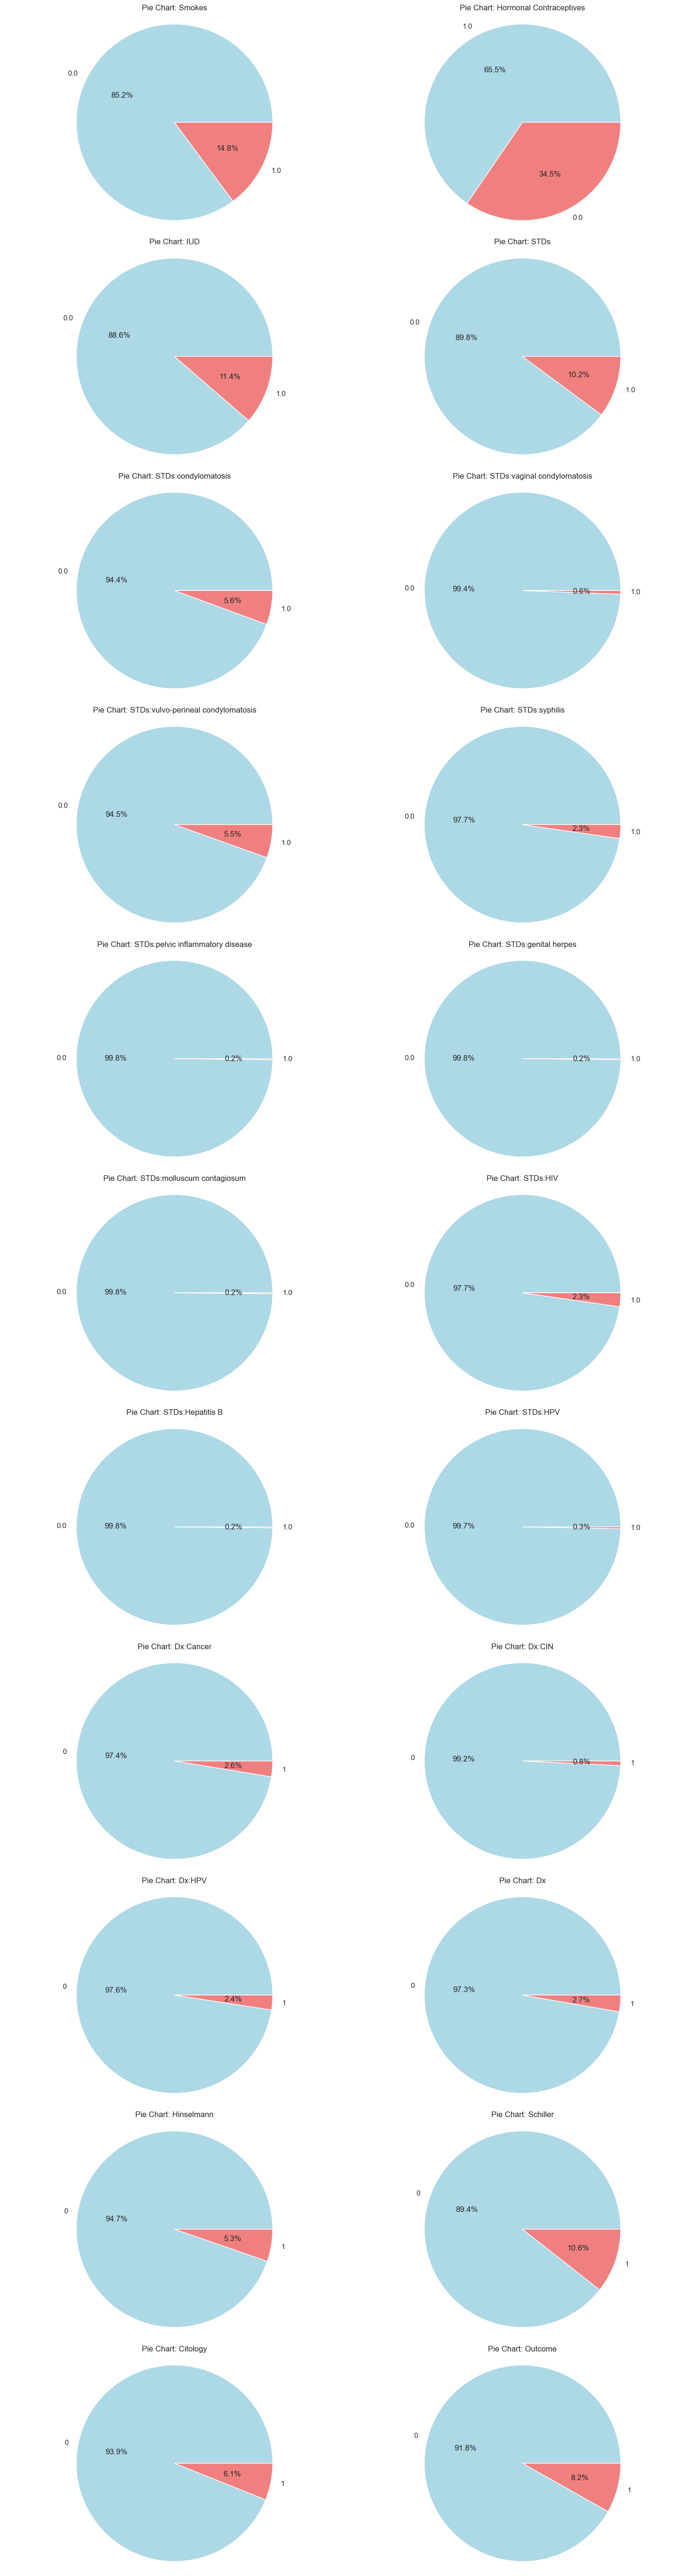

In [38]:
num_columns = len(categorical.columns)
num_rows = num_columns // 2 + num_columns % 2
plt.figure(figsize=(15, num_rows * 5))

for idx, column in enumerate(categorical.columns):
    plt.subplot(num_rows, 2, idx + 1)
    category_counts = categorical[column].value_counts()
    plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
    plt.title(f'Pie Chart: {column}')
    plt.axis('equal')

plt.tight_layout()

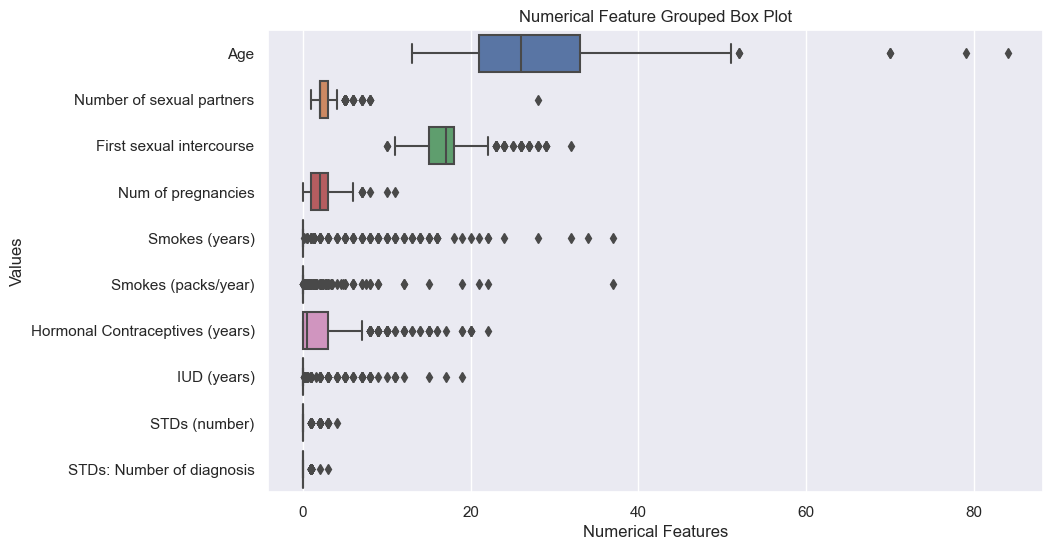

In [39]:
# Grouped Box Plot for Numerical Features
plt.figure(figsize=(10, 6))
sns.boxplot(data=numerical, orient='h')
plt.title('Numerical Feature Grouped Box Plot')
plt.xlabel('Numerical Features')
plt.ylabel('Values')
plt.show()

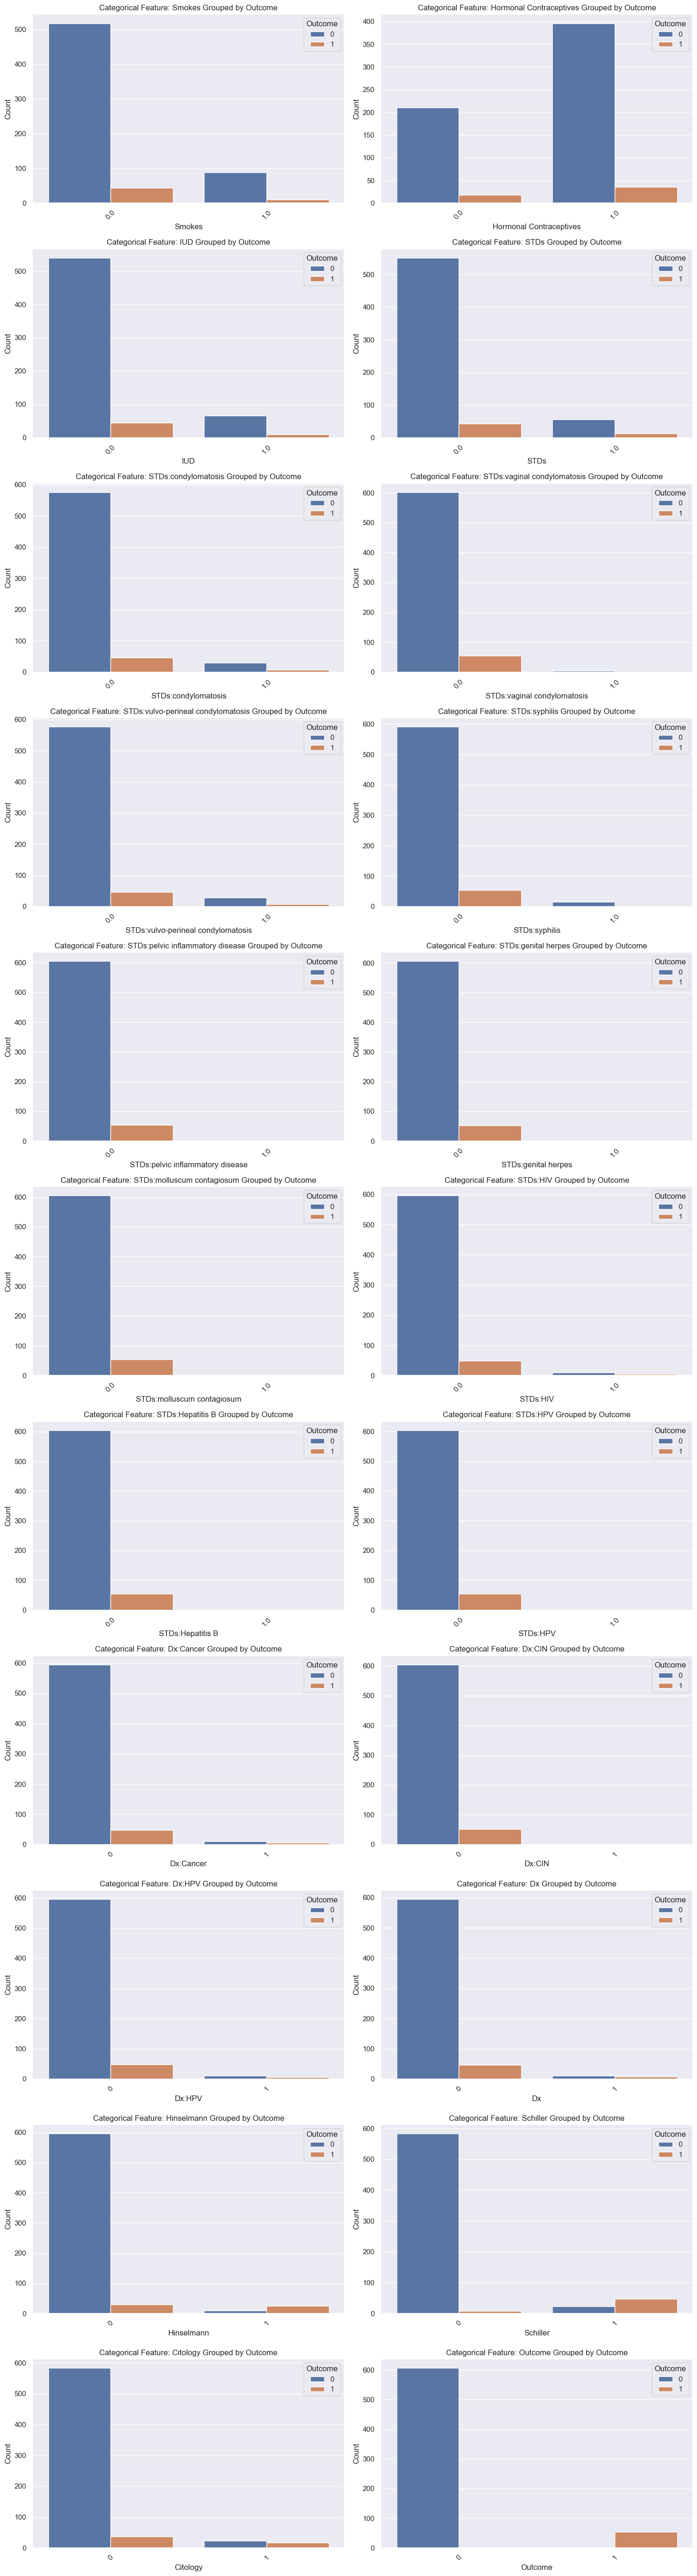

In [40]:
num_columns = len(categorical.columns)
num_rows = num_columns // 2 + num_columns % 2  # Number of rows for subplots

plt.figure(figsize=(15, num_rows * 5))

for idx, column in enumerate(categorical.columns):
    plt.subplot(num_rows, 2, idx+1)
    sns.countplot(data=categorical, x=column, hue='Outcome')
    plt.title(f'Categorical Feature: {column} Grouped by Outcome')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)

plt.tight_layout()

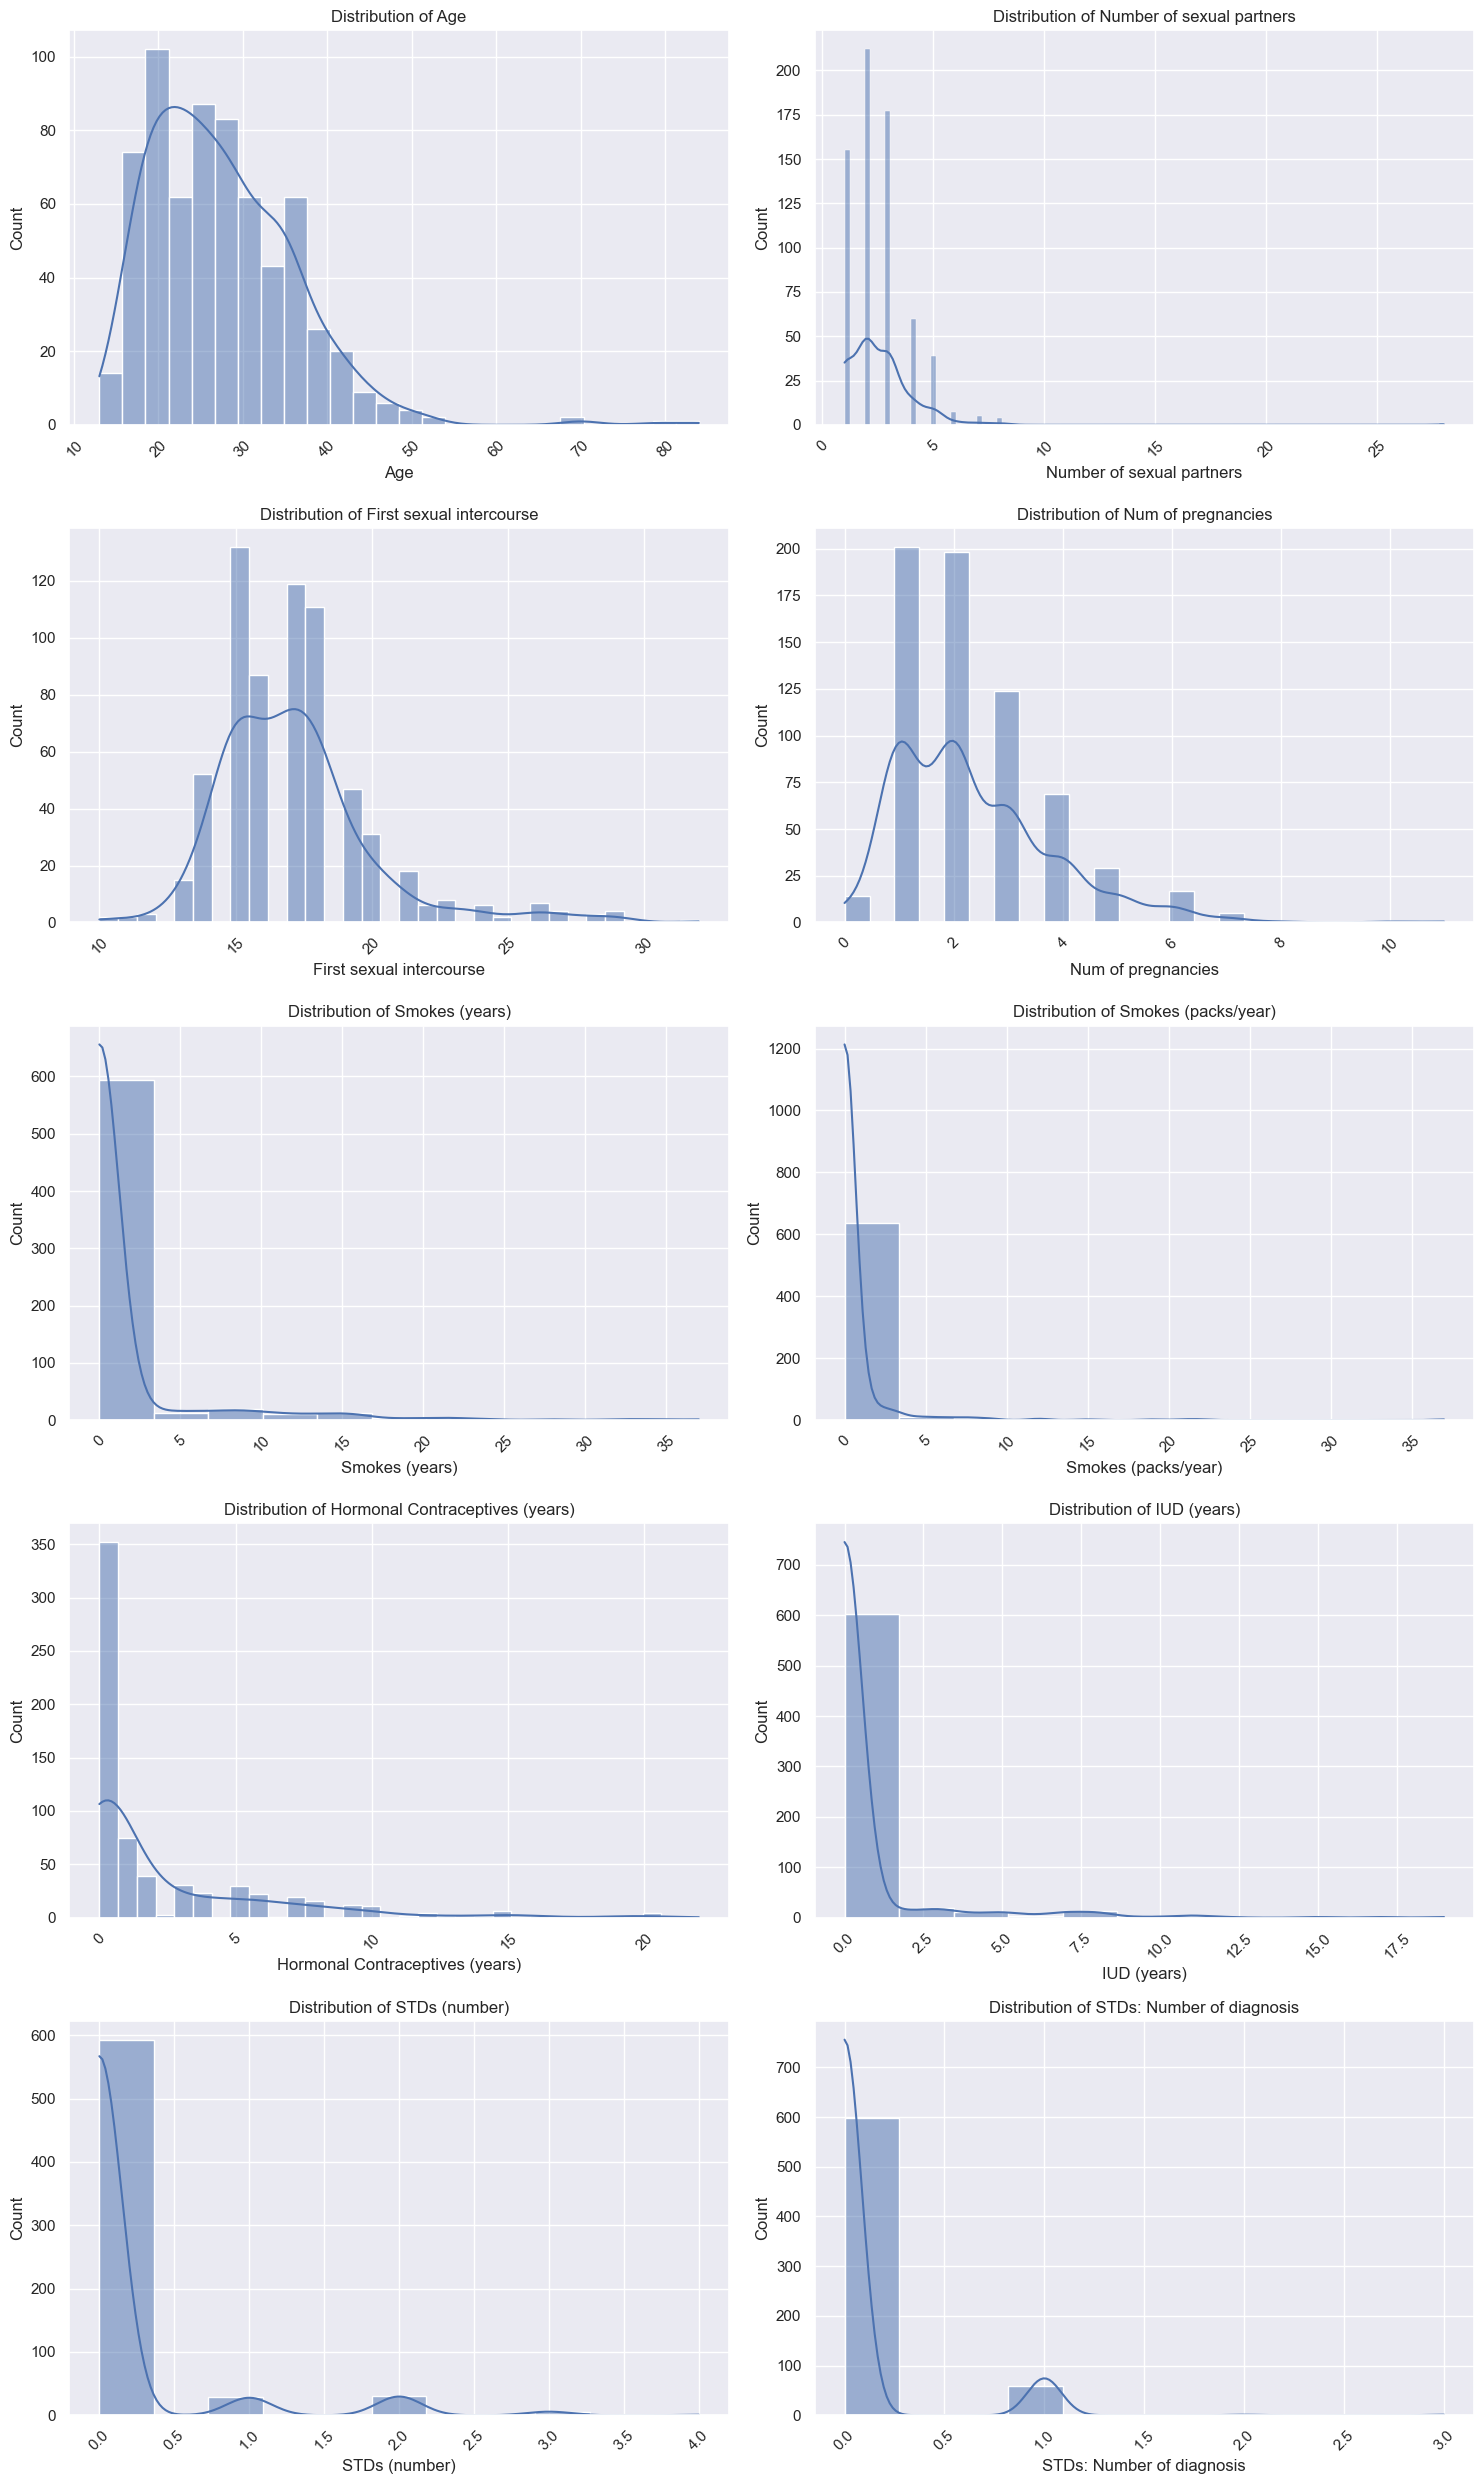

In [41]:
num_columns = len(numerical.columns)
num_rows = num_columns // 2 + num_columns % 2

plt.figure(figsize=(15, num_rows * 5))

for idx, column in enumerate(numerical.columns):
    plt.subplot(num_rows, 2, idx + 1)
    sns.histplot(data=numerical, x=column, kde=True) 
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)

plt.tight_layout()

In [42]:
ccancer['Hormonal Contraceptives'].value_counts() # 432 women were taking hormonal contraceptives, 228 were not

Hormonal Contraceptives
1.0    432
0.0    228
Name: count, dtype: int64

In [43]:
ccancer.IUD.value_counts() # 585 didn't take, 75 took

IUD
0.0    585
1.0     75
Name: count, dtype: int64

In [44]:
ccancer.STDs.value_counts() # 67 women with diseases, 593 without

STDs
0.0    593
1.0     67
Name: count, dtype: int64

In [45]:
ccancer['STDs:condylomatosis'].value_counts() # 37 women have, 623 don't

STDs:condylomatosis
0.0    623
1.0     37
Name: count, dtype: int64

[Text(0.5, 1.0, 'Rozkład pacjentów')]

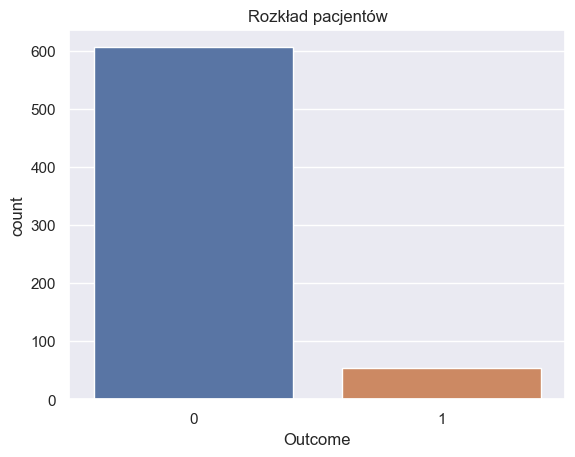

In [46]:
sns.countplot(x = 'Outcome', data = ccancer, dodge=False).set(title='Distribution of patients')

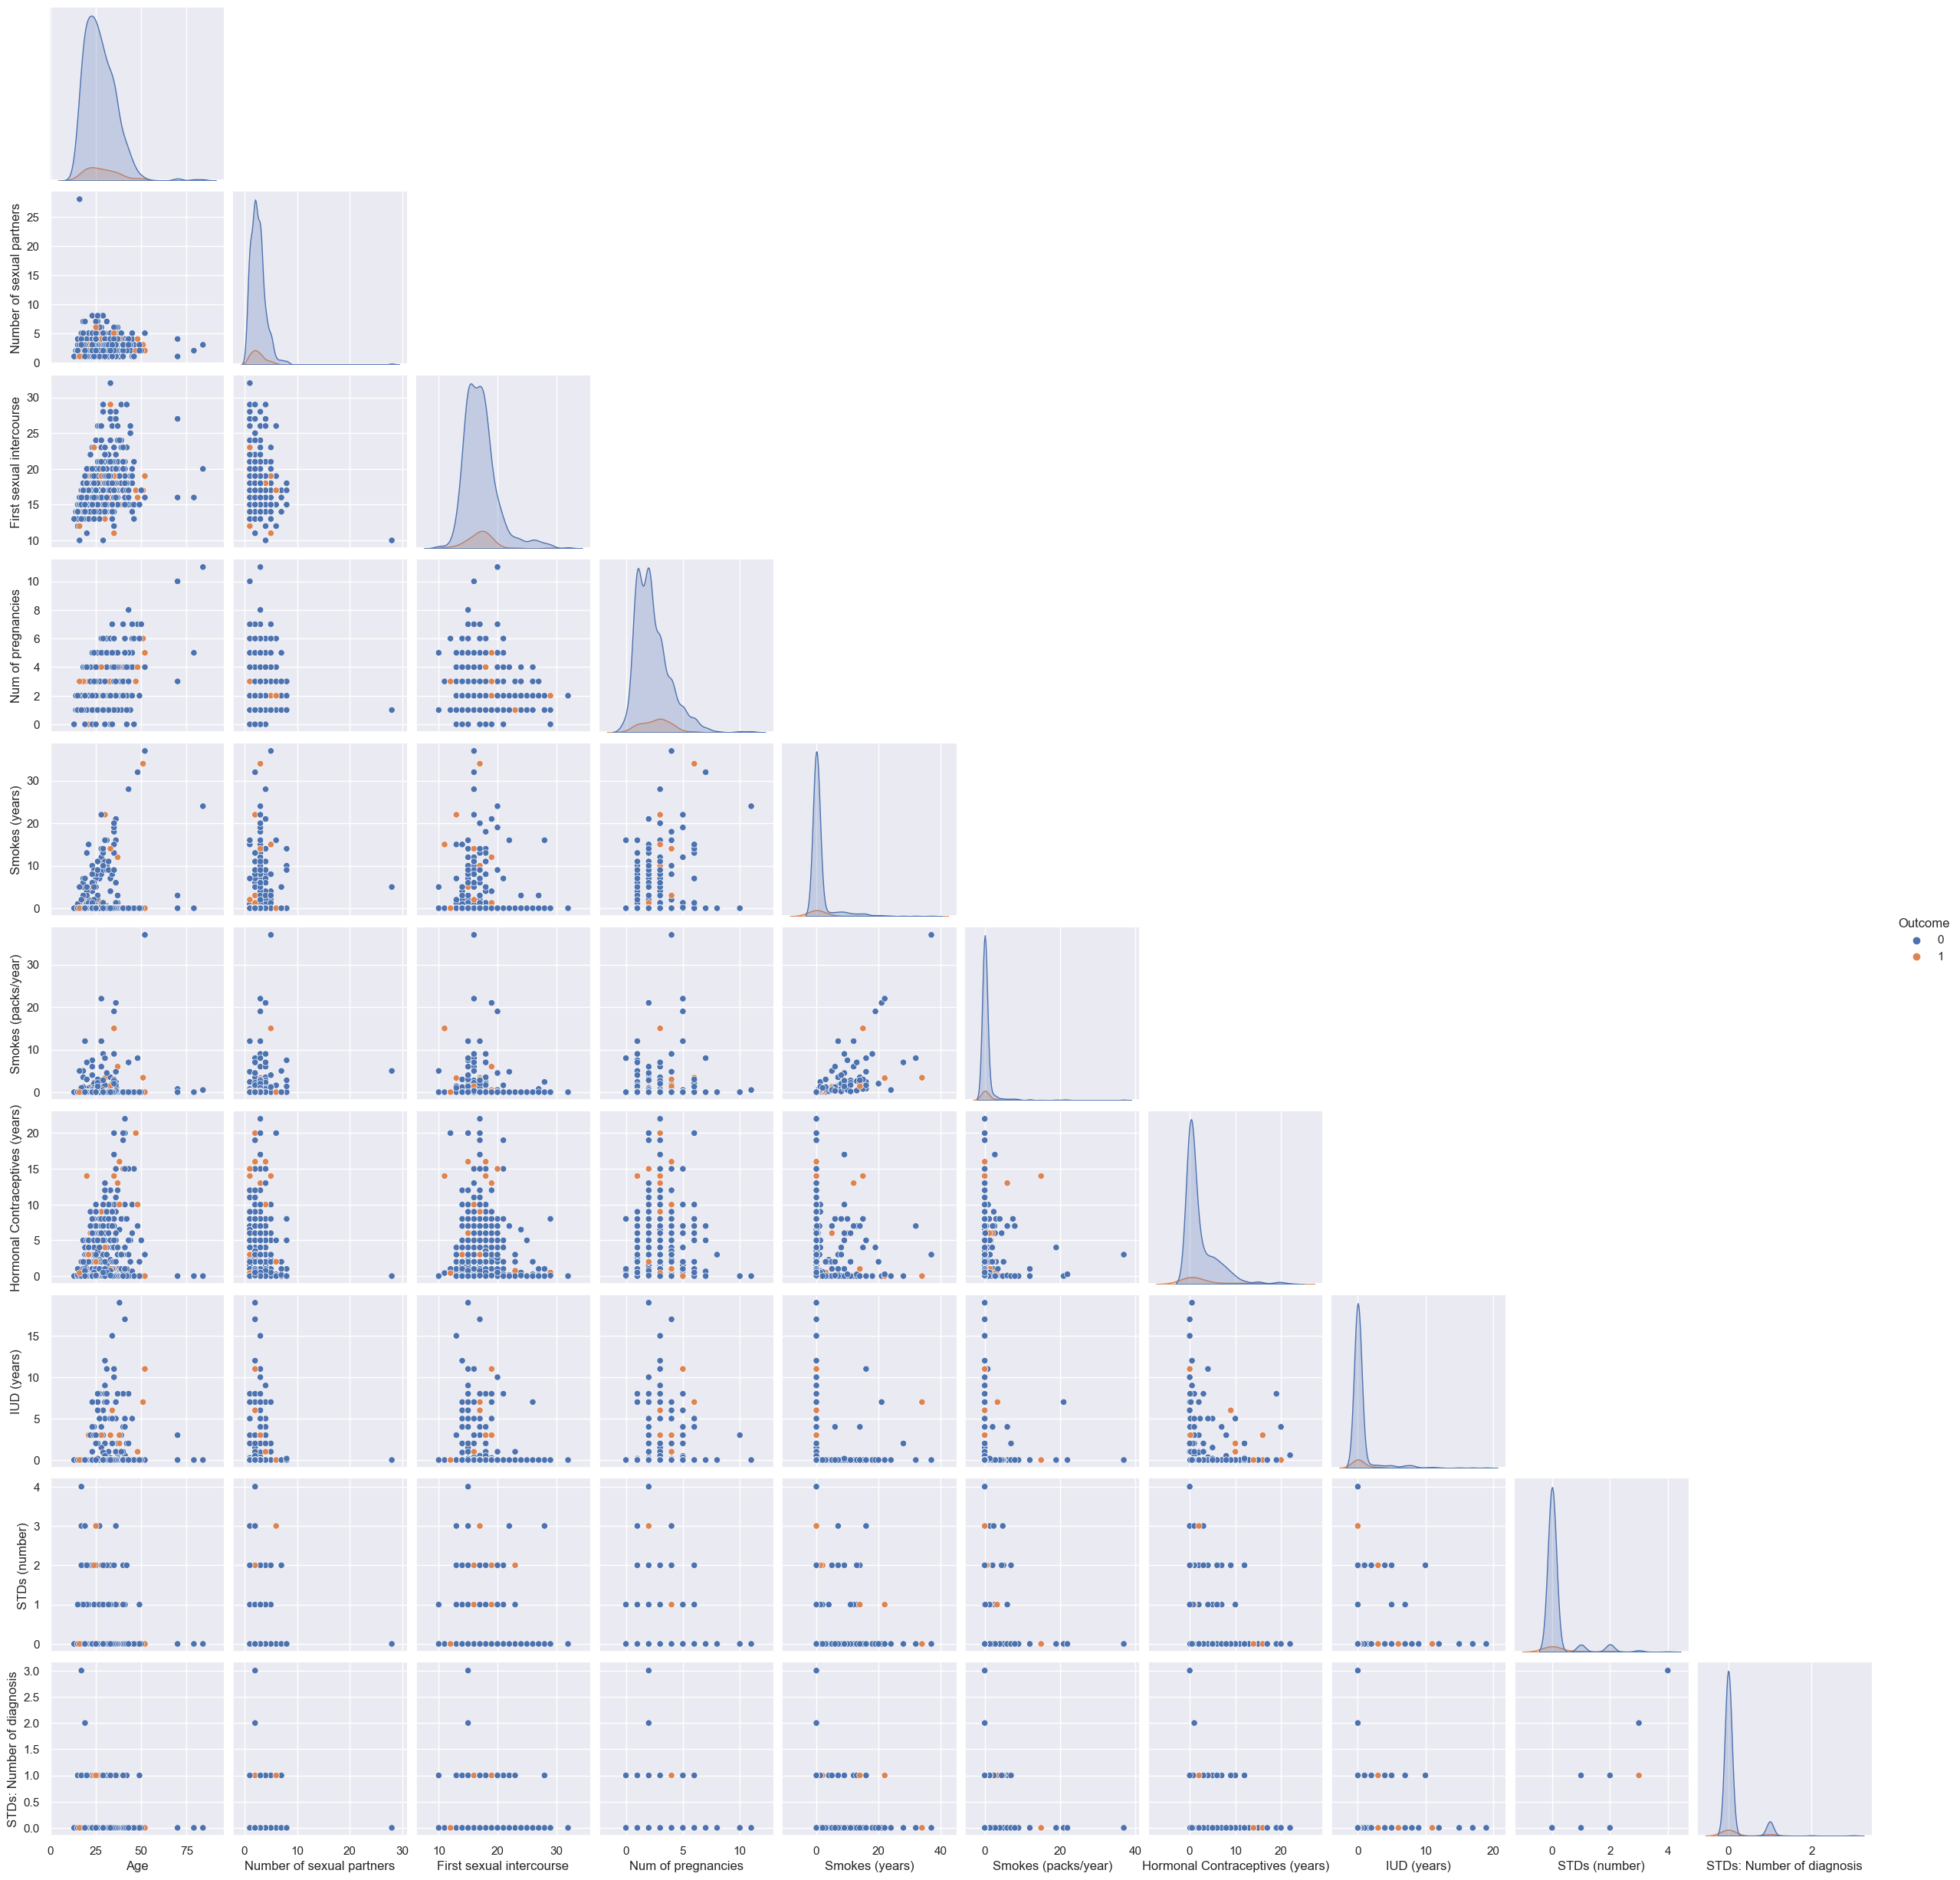

In [47]:
num = ccancer[['Age', 'Number of sexual partners', 'First sexual intercourse', 'Num of pregnancies', 'Smokes (years)', 'Smokes (packs/year)', 'Hormonal Contraceptives (years)', 'IUD (years)', 'STDs (number)', 'STDs: Number of diagnosis', 'Outcome']]
sns.pairplot(data = num, corner = True, diag_kind = 'kde', hue = 'Outcome')

### The numerical data doesn't tell us much. The data set focuses on categorical data - what comorbidities the patient had, how many of them were diagnosed, what tests and examinations she underwent, what she was diagnosed with, how long she has been suffering from them. It also focuses on whether she smoked cigarettes, and if so, how many a day and for how many years. The patient's age, number of sexual partners, and age of first intercourse are also taken into account. Was she taking contraceptives and if so, for how many years. Categorical data analysis is more appropriate here - I'll make charts.

Text(0.5, 1.0, 'Heatmap correlation')

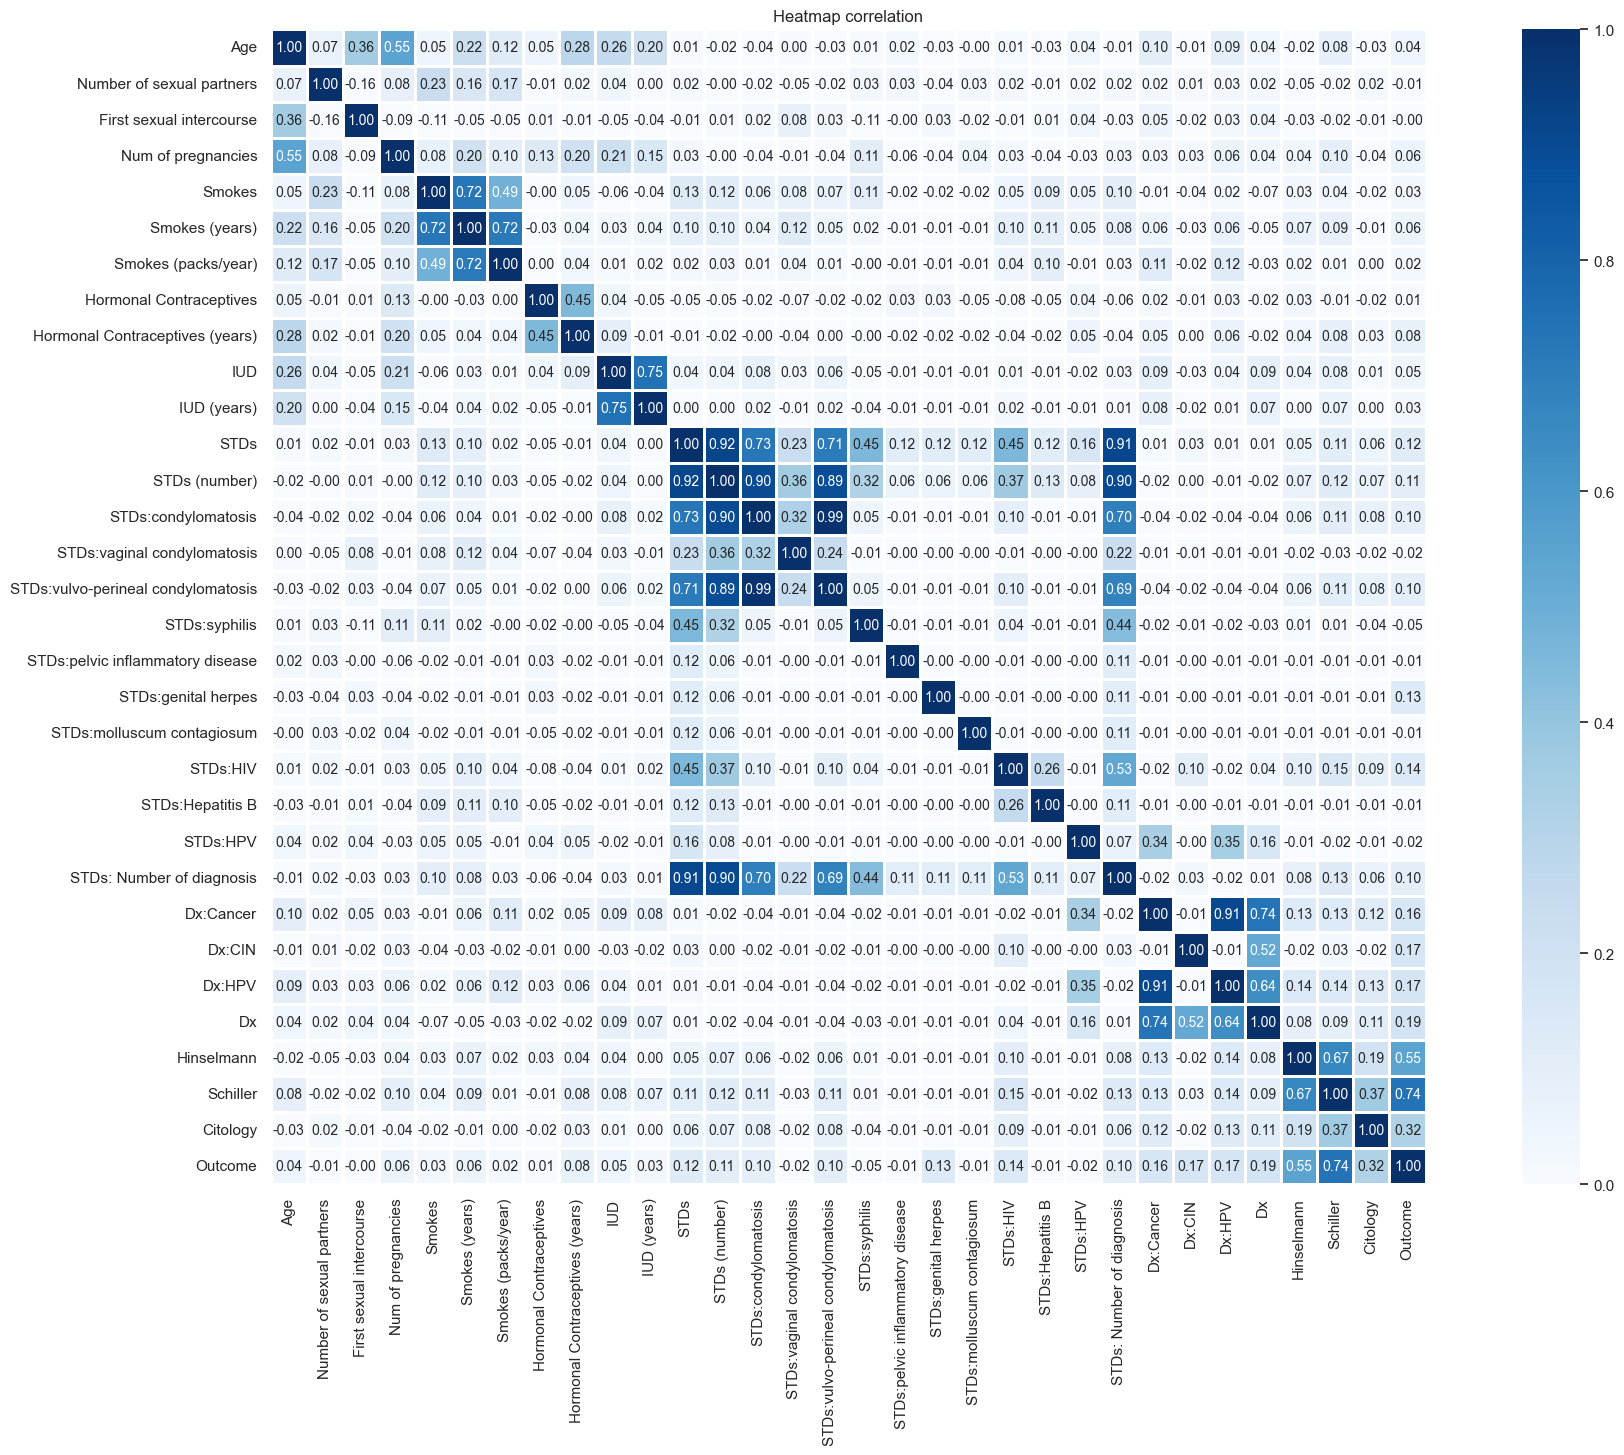

In [48]:
corr = ccancer.corr()
plt.figure(figsize = (25, 15))
hm = sns.heatmap(corr, annot=True, linewidths=2, fmt='.2f', annot_kws={'size': 10}, vmax=1, vmin=0, square=True, cmap='Blues')
plt.title("Heatmap correlation")

Text(0.5, 1.0, 'Heatmap correlation')

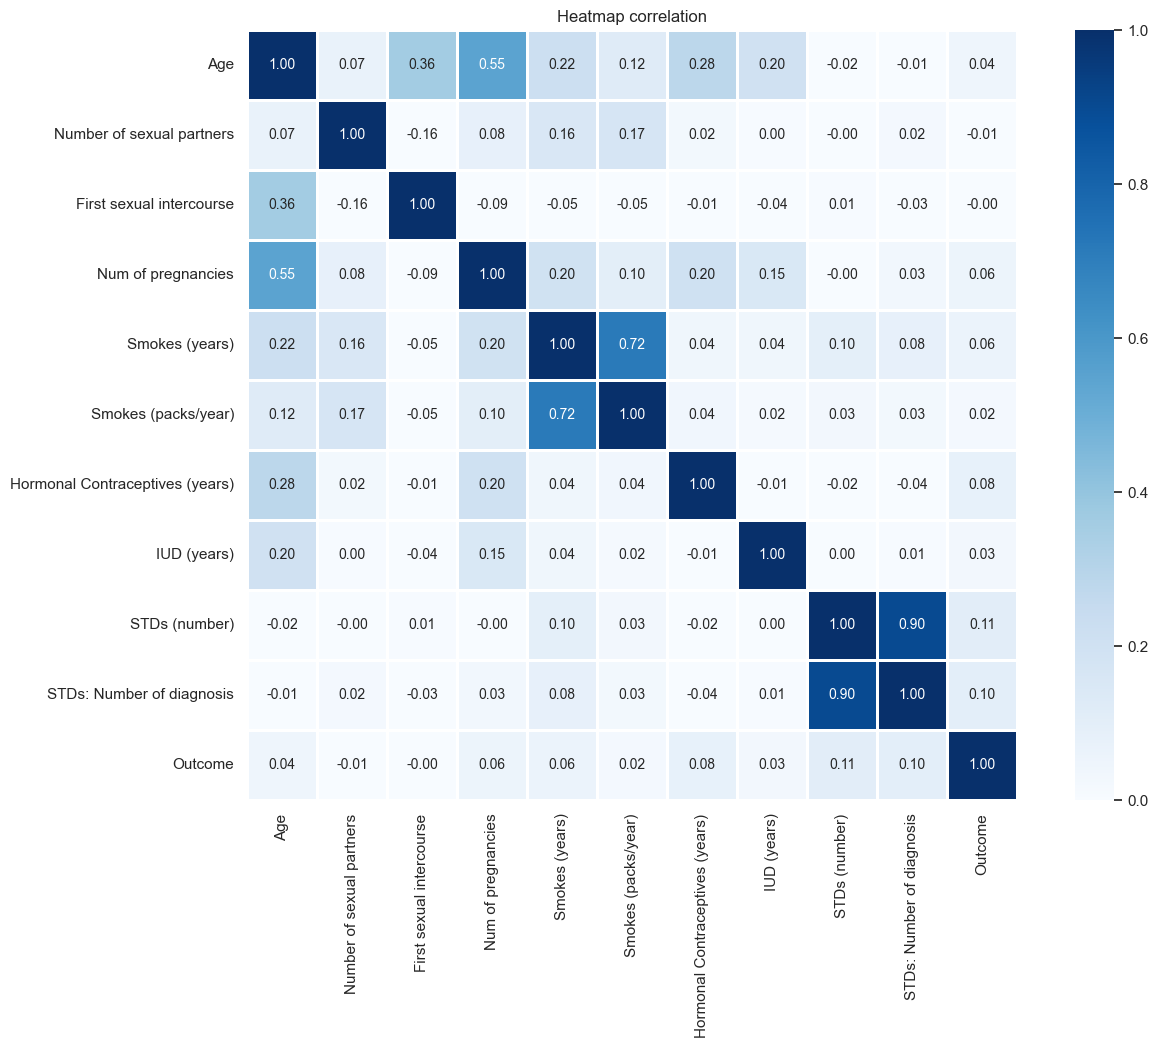

In [49]:
corr = num.corr()
plt.figure(figsize = (15, 10))
hm = sns.heatmap(corr, annot=True, linewidths=2, fmt='.2f', annot_kws={'size': 10}, vmax=1, vmin=0, square=True, cmap='Blues')
plt.title("Heatmap correlation")

### Age correlates with number of pregnancies (0.55), age correlates weakly with first sexual initiation (0.36). Smoking is correlated with the number of cigarettes smoked, but this is an obvious group association (0.72). So do the number of STDs and the number of diagnoses (0.90). Features in the same group, correlate with each other - which is obvious. Likewise, tests for cancer detection are correlated with Outcome. No clear correlations between features.

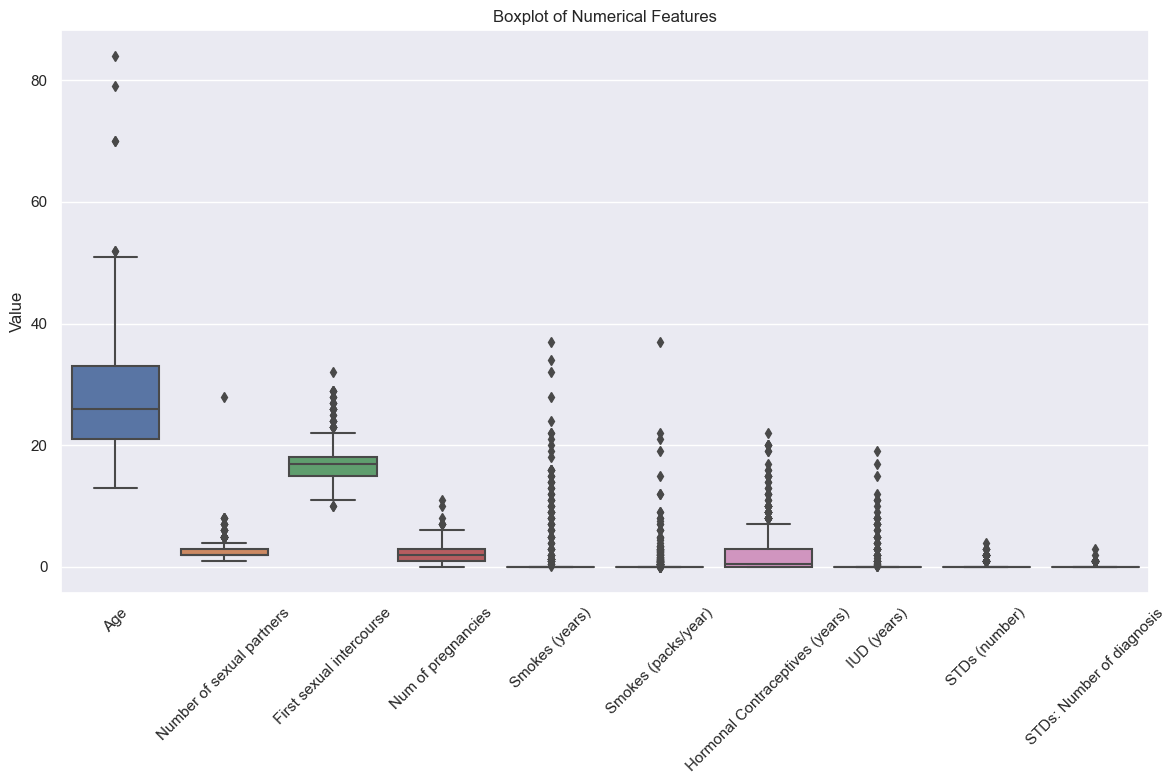

In [50]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=numerical)
plt.title('Boxplot of Numerical Features')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

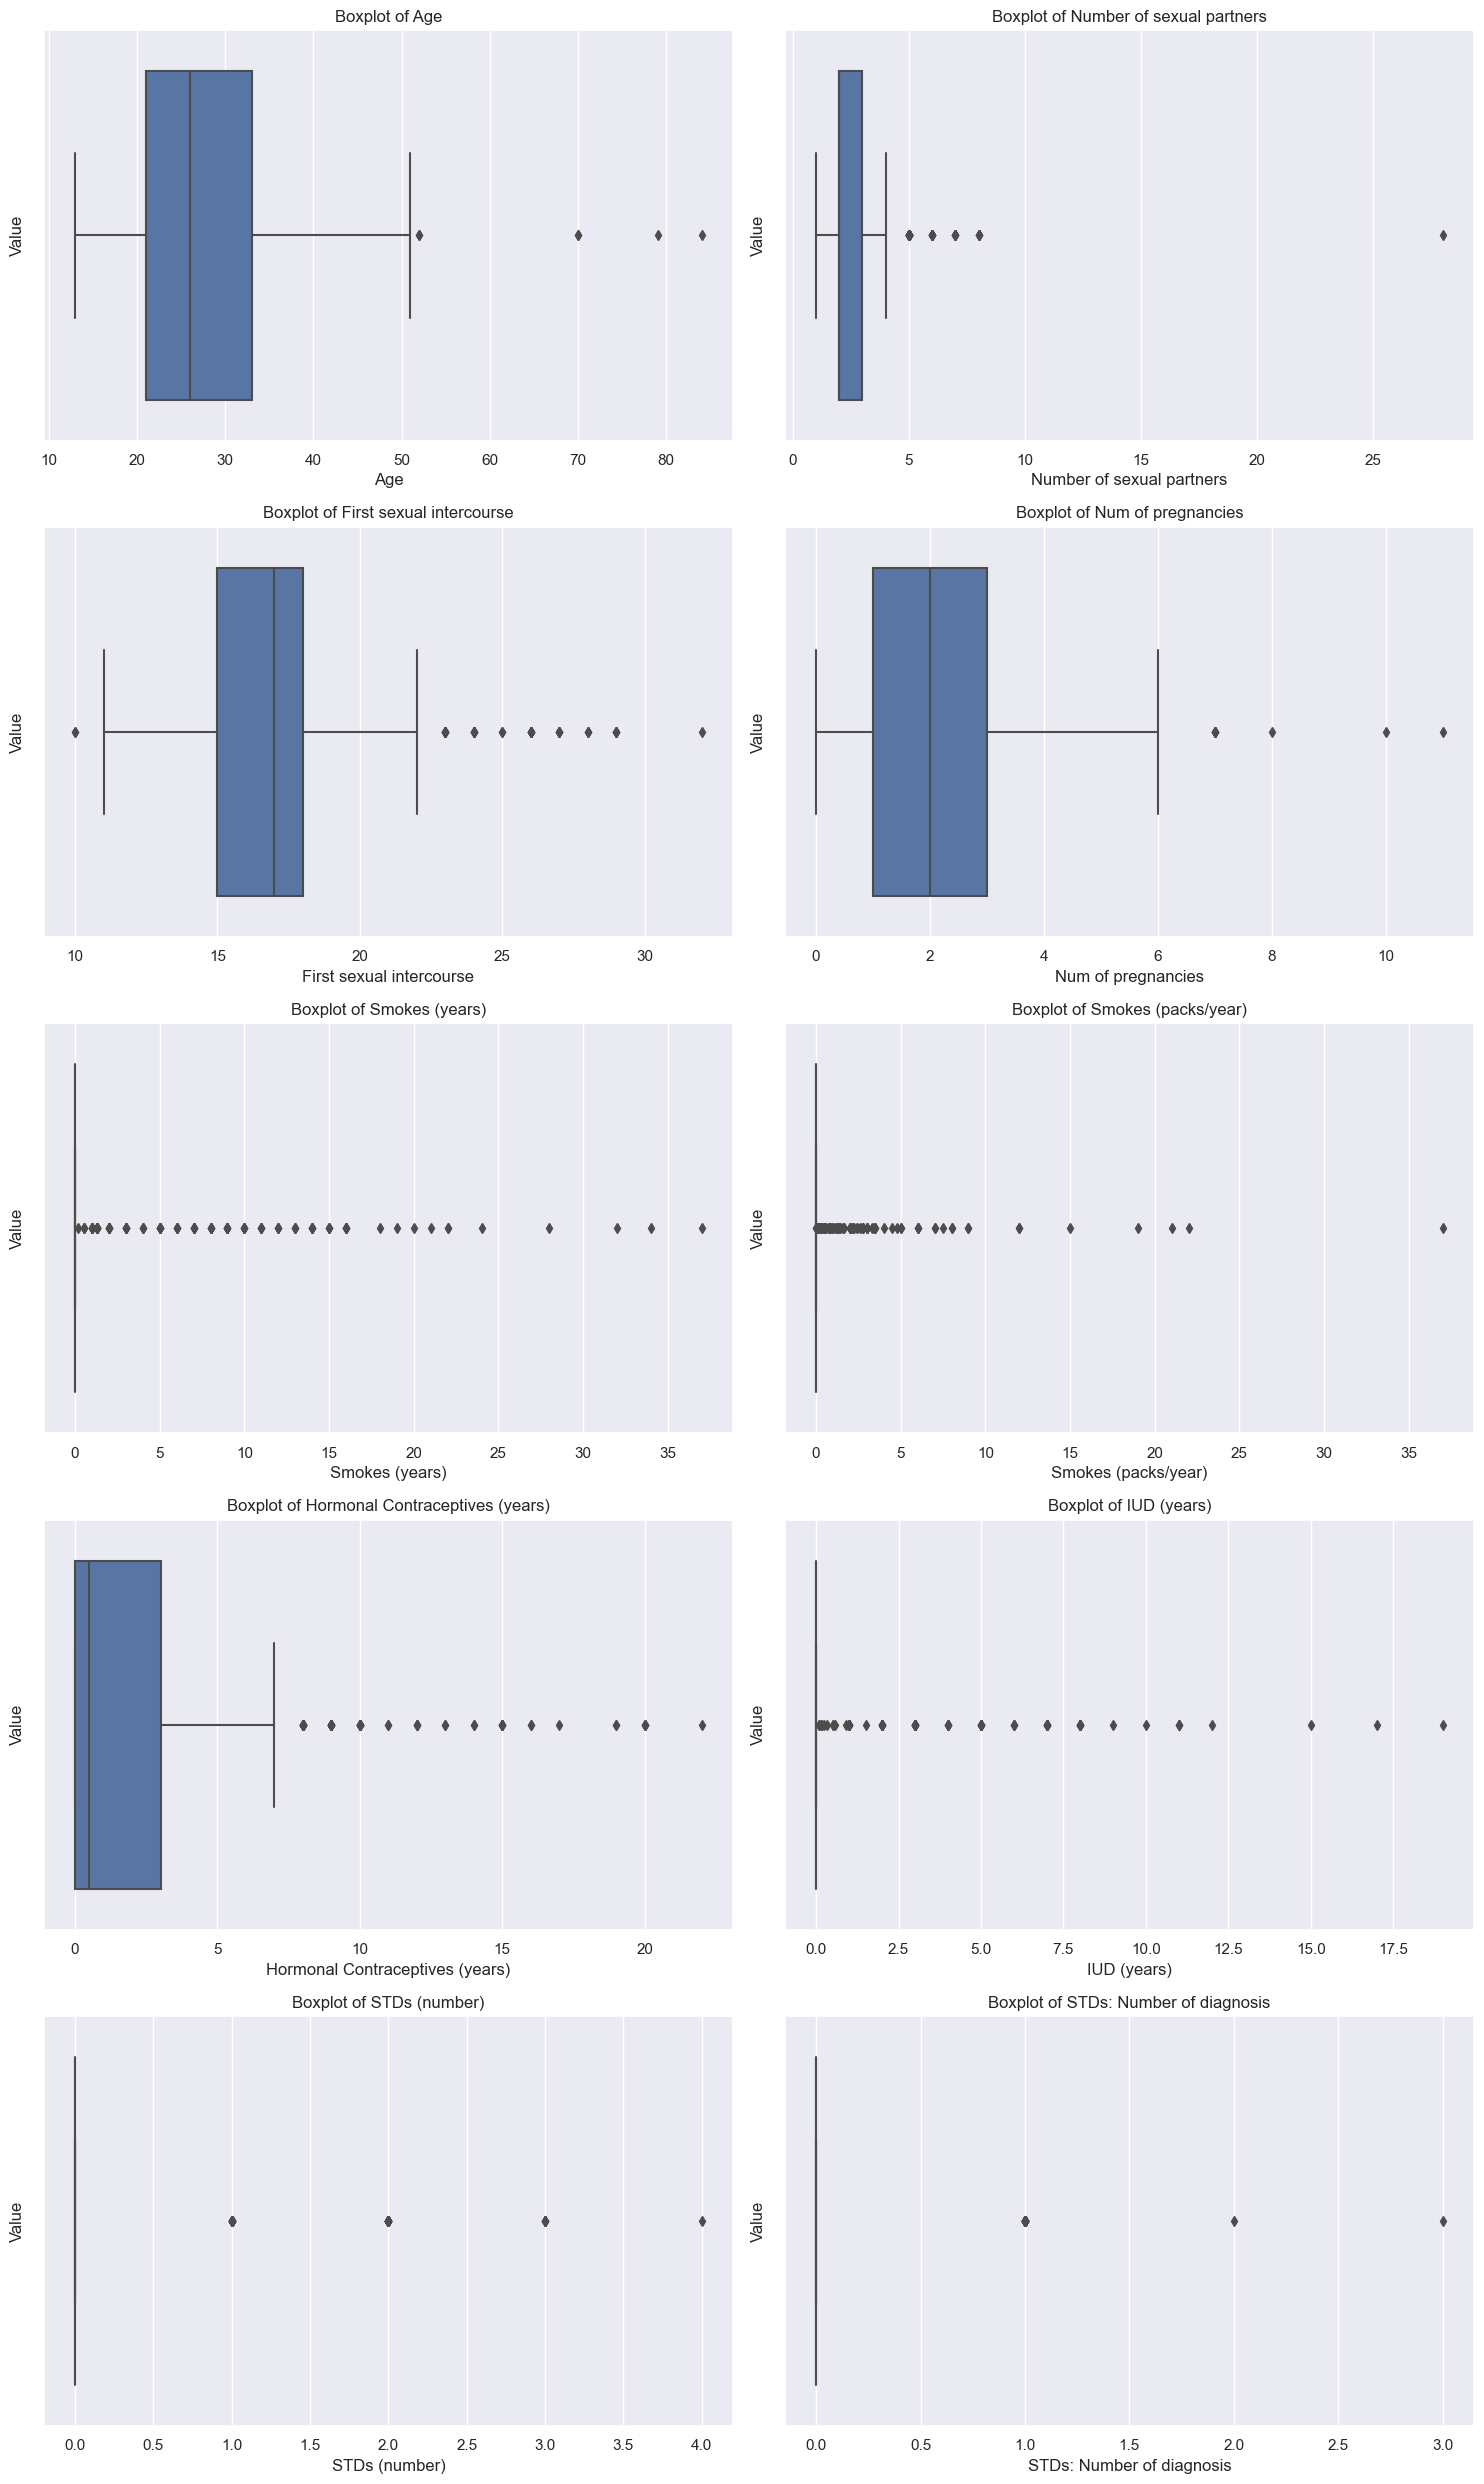

In [51]:
num_columns = len(numerical.columns)
num_rows = num_columns // 2 + num_columns % 2

plt.figure(figsize=(15, num_rows * 5))

for idx, column in enumerate(numerical.columns):
    plt.subplot(num_rows, 2, idx + 1)
    sns.boxplot(data=numerical, x=column)
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.ylabel('Value')

plt.tight_layout()

### A lot of outliers, but they may indicate sick people. So I wouldn't remove them because they're not likely to be errors.

In [52]:
ccancer.to_csv('ccancer.csv', index = False)

### Analysis complete.